# Heatmap Test

In [109]:
import os
os.chdir('/home/fraza0/Desktop/MEI/TESE/nonverbal_communication_analysis')
print("Working Directory:", os.getcwd())

import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice
%matplotlib inline

Working Directory: /home/fraza0/Desktop/MEI/TESE/nonverbal_communication_analysis


In [180]:
frame1_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut001.png'
frame2_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut002.png'
frame3_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut003.png'
frame4_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut004.png'
frame5_path = 'DATASET_DEP/SYNC/3CLC9VWRSAMPLE/task_1/frames/cut005.png'

frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)
frame3 = cv2.imread(frame3_path)
frame4 = cv2.imread(frame4_path)
frame5 = cv2.imread(frame5_path)

activity_frame = np.zeros(frame1.shape[:2], np.int)

In [181]:
def frame_energy(previous_frame, current_frame):
    frame_diff = cv2.absdiff(previous_frame, current_frame)
    gs_frame_diff = cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
    ret, threshold_frame_diff = cv2.threshold(gs_frame_diff,127,1,cv2.THRESH_BINARY)
    return threshold_frame_diff

In [183]:
activity_frame += frame_energy(frame1, frame2)
activity_frame += frame_energy(frame2, frame3)
activity_frame += frame_energy(frame3, frame4)
activity_frame += frame_energy(frame4, frame5)

Total Energy 80


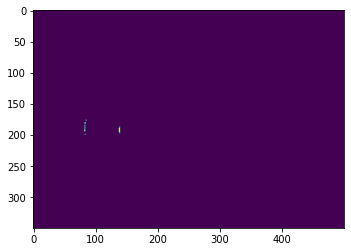

In [190]:
plt.imshow(activity_frame)
print("Total Energy", np.sum(activity_frame))

### Grab sample frame and overlay the heatmap with more energy zones

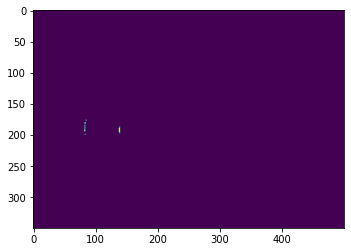

In [192]:
sample_frame = frame1
overlay_heatmap = activity_frame

plt.imshow(sample_frame)
plt.imshow(activity_frame, cmap=plt.cm.viridis, alpha=.9)

im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                 extent=extent)
im2 = plt.imshow(Z2, cmap=plt.cm.viridis, , interpolation='bilinear',
                 extent=extent)